# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

# Read data

In [2]:
data = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Check for column wise null values in the dataset

In [3]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Barplot for Age vs Annual Income

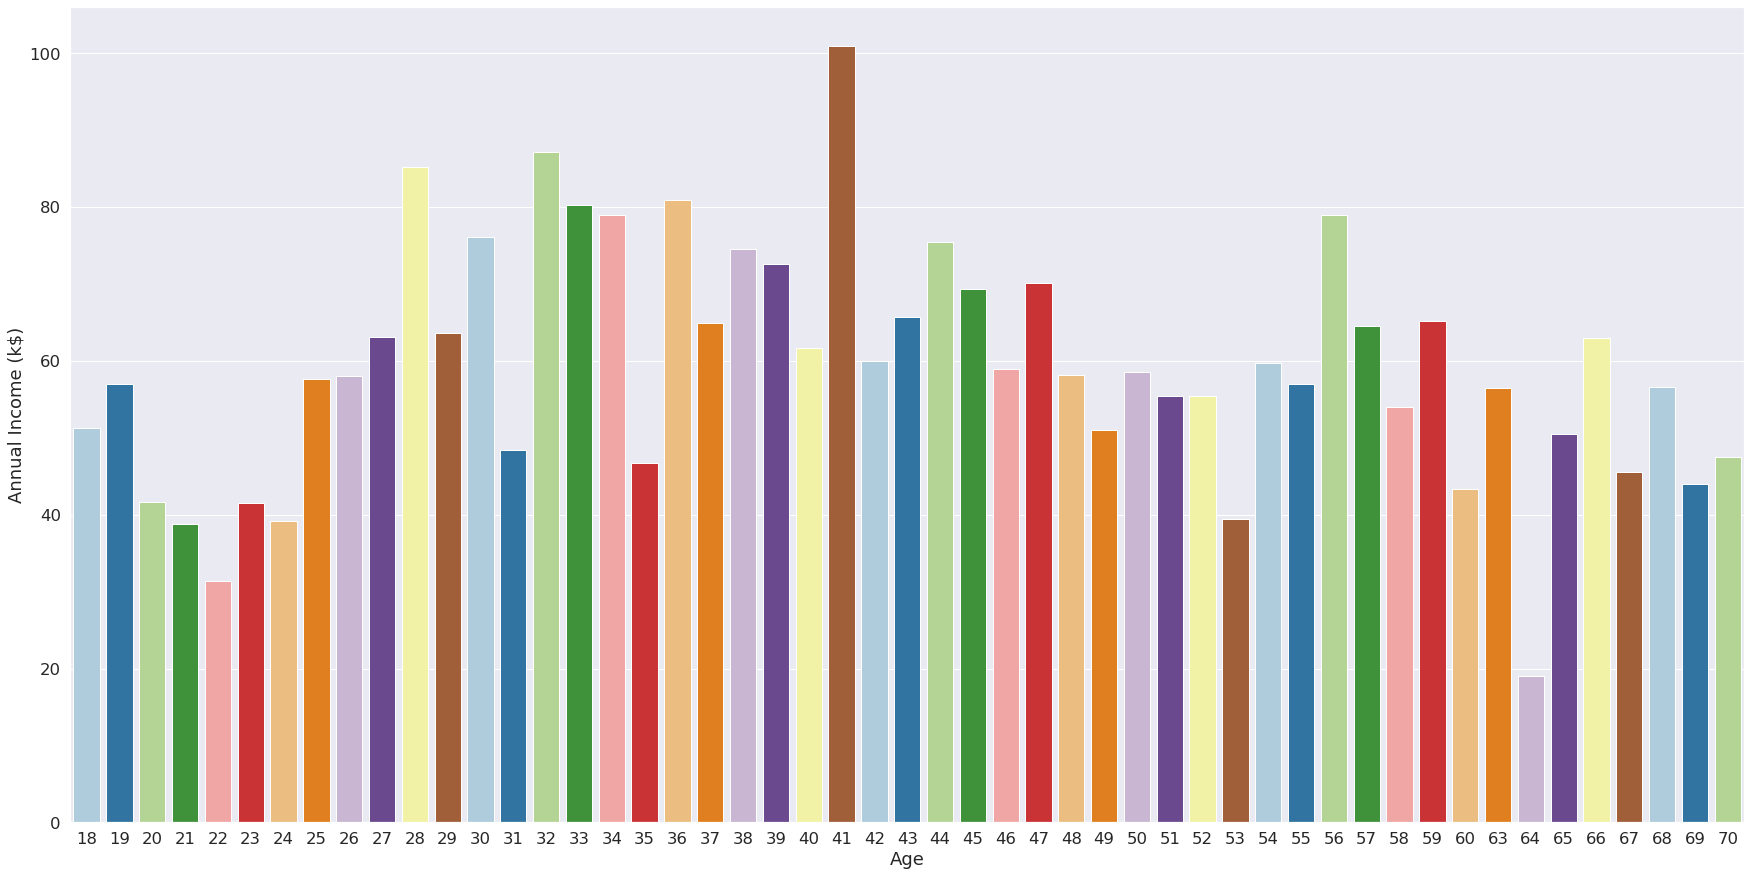

In [12]:
sns.barplot(x = data['Age'], y = data['Annual Income (k$)'], ci = None, palette = 'Paired')
sns.set(rc={'figure.figsize':(30,15)})
sns.set(font_scale=1.5)

# Barplot for Age vs Spending Score

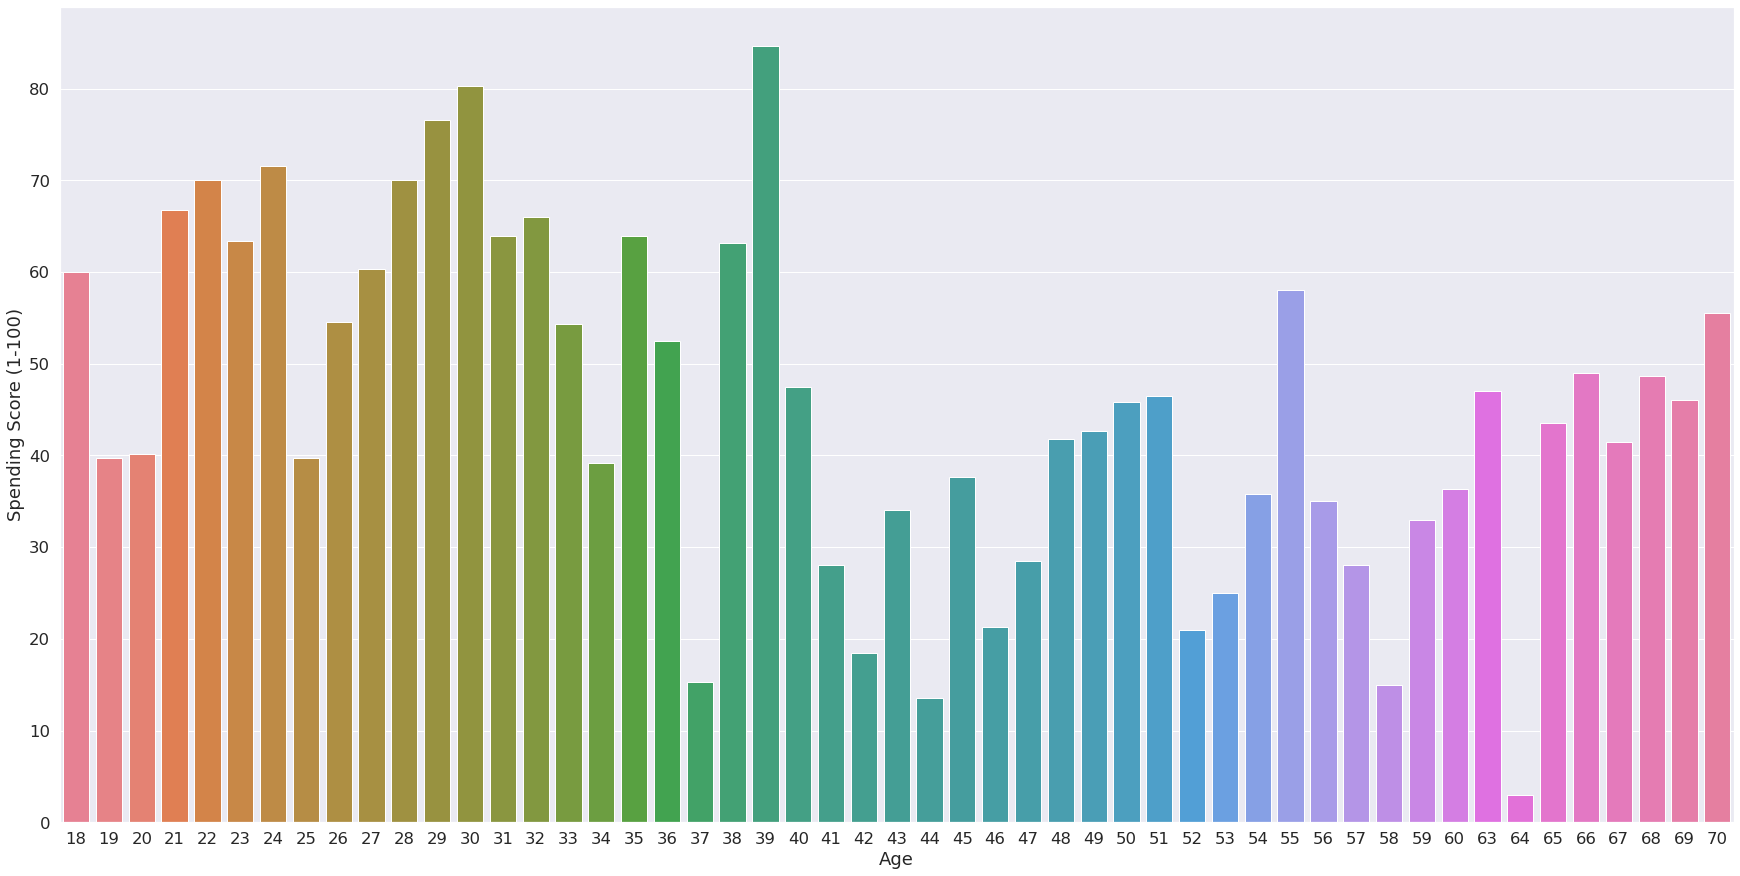

In [13]:
sns.barplot(x = data['Age'], y = data['Spending Score (1-100)'], ci = None,  palette = 'husl')
sns.set(rc={'figure.figsize':(31,15)})
sns.set(font_scale=1.5)

# Heatmap to check for coorelation of features

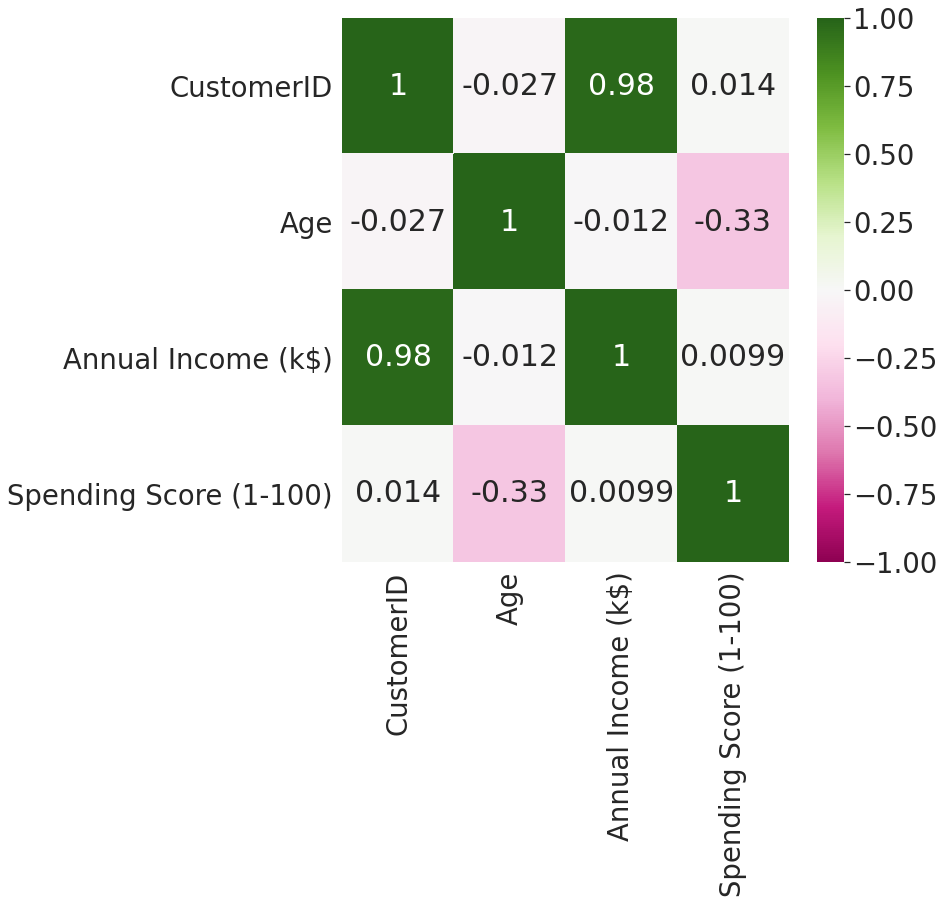

In [15]:
sns.heatmap(data.corr(), vmin=-1, cmap='PiYG', annot=True)
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1.5)

# Specify the X (features) for clustering

In [8]:
X = data.iloc[:, [3,4]].values

# Import K-Means

In [17]:
from sklearn.cluster import KMeans
kray=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    kray.append(kmeans.inertia_)


# The Elbow Method to find adequate number of clusters 

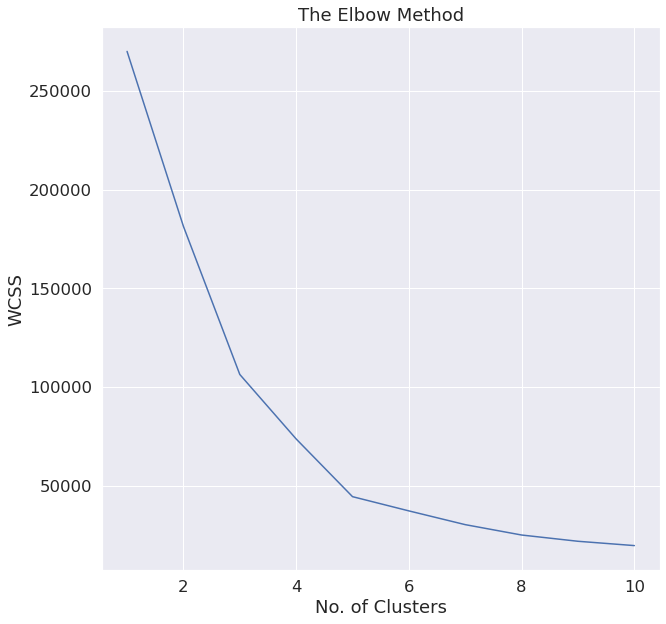

In [18]:
plt.plot(range(1,11), kray)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the model and predict using X

In [19]:
model = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_preds = model.fit_predict(X)

# Plot the clusters

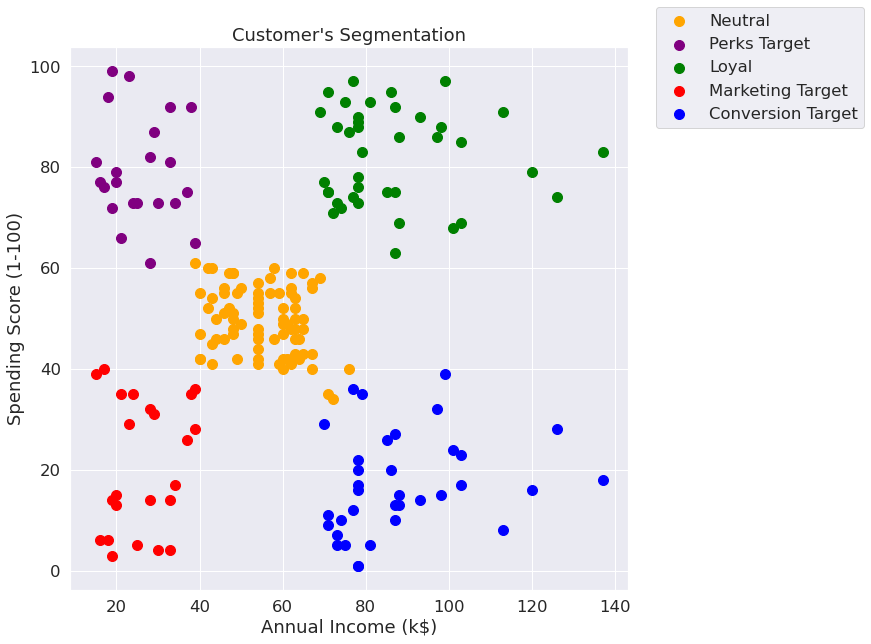

In [20]:
plt.scatter(X[y_preds == 0, 0], X[y_preds == 0, 1], s = 100, c = 'orange', label = 'Neutral')
plt.scatter(X[y_preds == 1, 0], X[y_preds == 1, 1], s = 100, c = 'purple', label = 'Perks Target')
plt.scatter(X[y_preds == 2, 0], X[y_preds == 2, 1], s = 100, c = 'green', label = 'Loyal')
plt.scatter(X[y_preds == 3, 0], X[y_preds == 3, 1], s = 100, c = 'red', label = 'Marketing Target')
plt.scatter(X[y_preds == 4, 0], X[y_preds == 4, 1], s = 100, c = 'blue', label = 'Conversion Target')

plt.title('Customer\'s Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc=(1.05,0.85))
plt.show()

# For 3D clustering

In [21]:
X_ThreeD = data[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
ThreeDray = []
for n in range(1 , 11):
    new_model = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state = 1  , algorithm='elkan') )
    new_model.fit(X_ThreeD)
    ThreeDray.append(new_model.inertia_)

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  "cluster. Using 'full' instead.", RuntimeWarning)


# The Elbow Method to find adequate number of clusters



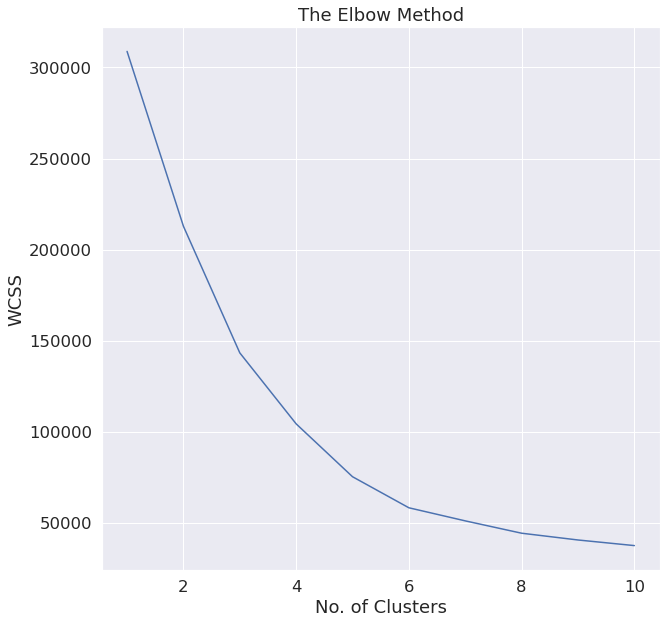

In [23]:
plt.plot(range(1,11), ThreeDray)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the model for 3D clustering

In [25]:
new_model = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 1  , algorithm='elkan') )
new_model.fit(X_ThreeD)
labels = new_model.labels_

# Plot the 3D clusters

In [26]:
py.offline.init_notebook_mode(connected = True)
data['labels'] =  labels
trace1 = go.Scatter3d(
    x = data['Age'],
    y = data['Spending Score (1-100)'],
    z = data['Annual Income (k$)'],
    mode ='markers',
    marker = dict(color = data['labels'], size = 20, line = dict(color= data['labels'], width= 12), opacity = 0.8)) 

data = [trace1]
layout = go.Layout(title= 'Customers\' Segmentation', scene = dict(xaxis = dict(title  = 'Age'), 
                                                   yaxis = dict(title  = 'Spending Score (1-100)'), 
                                                   zaxis = dict(title  = 'Annual Income (k$)')))

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()